/home/foxybunny/miniconda3/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/foxybunny/miniconda3/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


       snp_gap_id gene_name_trait  score_trait gene_name_notrait  \
0               1    Os03g0430500    23.830670      Os03g0430500   
1               2    Os06g0132600   100.000000      Os06g0132600   
2               3    Os06g0218500     6.162277      Os06g0220500   
3               4    Os06g0229000     3.889107      Os06g0229000   
4               5    Os12g0287300    16.682829      Os12g0288000   
...           ...             ...          ...               ...   
21052       21053    Os07g0586900     1.373118      Os07g0585700   
21053       21054    Os08g0260600     0.160216      Os08g0274700   
21054       21055    Os09g0114500     0.090072      Os09g0287000   
21055       21056    Os10g0122600     0.866358      Os10g0125300   
21056       21057    Os10g0122600     0.761154      Os10g0125300   

       score_notrait match  
0          23.830670     1  
1         100.000000     1  
2           6.064387     0  
3           3.889107     1  
4          37.974162     0  
...      

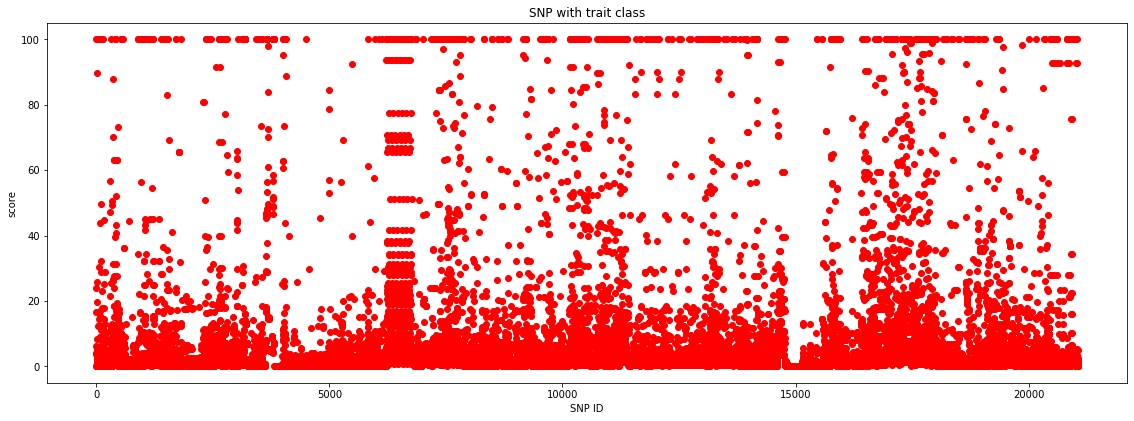

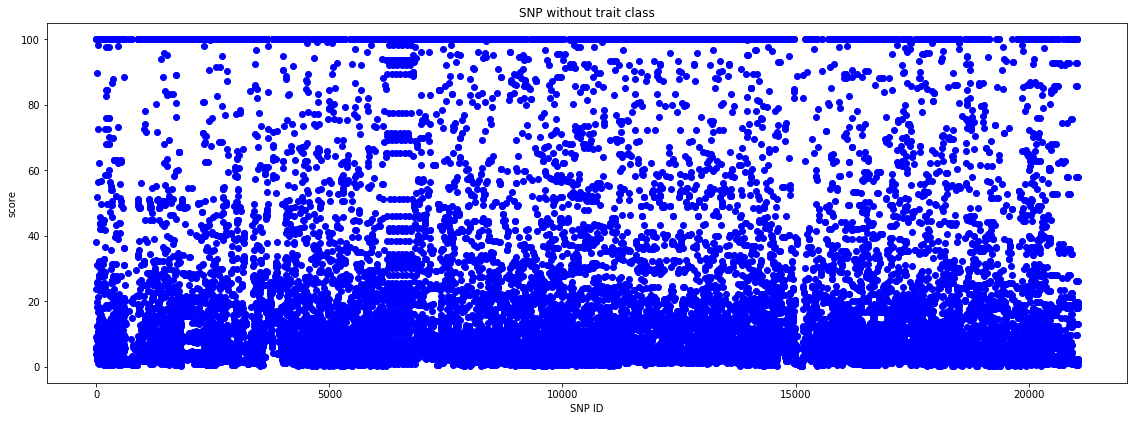

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

result_trait = pd.read_csv('result.csv', engine = 'python')
result_notrait = pd.read_csv('result_para.csv', engine = 'python')

final = pd.merge(result_trait, result_notrait, how='inner', on=['snp_gap_id'])
final = final.rename(columns={"score_x": "score_trait", "score_y": "score_notrait", 'gene_name_x': 'gene_name_trait', 'gene_name_y': 'gene_name_notrait'})
final['match'] = None


for i in range(len(final.index)):
	if final['score_trait'][i] == final['score_notrait'][i]:
		final['match'][i] = 1
	else:
		final['match'][i] = 0


print(final)
#export_csv = final.to_csv('final.csv', index = None, header = True)


#	plot
snp_id = final.snp_gap_id
score_trait = final.score_trait
score_notrait = final.score_notrait


fig = plt.figure(figsize = (15,5))
ax = fig.add_axes([0,0,1,1])
ax.scatter(snp_id, score_trait, color='r')
ax.set_xlabel('SNP ID')
ax.set_ylabel('score')
ax.set_title('SNP with trait class')
plt.show()



fig = plt.figure(figsize = (15,5))
ax = fig.add_axes([0,0,1,1])
ax.scatter(snp_id, score_notrait, color='b')
ax.set_xlabel('SNP ID')
ax.set_ylabel('score')
ax.set_title('SNP without trait class')
plt.show()
